In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Data.csv')

In [3]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [4]:
data.isnull().mean()

Country      0.0
Age          0.1
Salary       0.1
Purchased    0.0
dtype: float64

In [2]:
from feature_engine.missing_data_imputers import MeanMedianImputer
import seaborn as sns

In [13]:
mdi=MeanMedianImputer(imputation_method='mean',variables=['Age','Salary'])

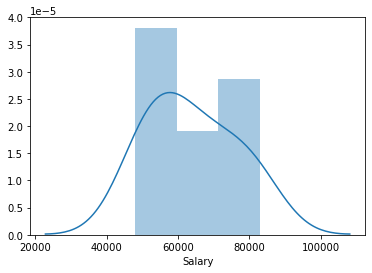

In [12]:
sns.distplot(data['Salary'])

In [15]:
X=data.drop('Purchased',axis=1)

In [16]:
X.head()

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN


In [23]:
X=mdi.fit_transform(X)

In [31]:
X['Salary']=np.round(X['Salary'])
X['Age']=np.round(X['Age'])

In [32]:
X.head(10)

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,63778.0
5,France,35.0,58000.0
6,Spain,39.0,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [3]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [38]:
onc=OneHotCategoricalEncoder(variables=['Country'])

In [36]:
X.head()

,Age,Salary,Country_France,Country_Spain,Country_Germany
0,44.0,72000.0,1,0,0
1,27.0,48000.0,0,1,0
2,30.0,54000.0,0,0,1
3,38.0,61000.0,0,1,0
4,40.0,63778.0,0,0,1


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              10 non-null     float64
 1   Salary           10 non-null     float64
 2   Country_France   10 non-null     int32  
 3   Country_Spain    10 non-null     int32  
 4   Country_Germany  10 non-null     int32  
dtypes: float64(2), int32(3)
memory usage: 408.0 bytes


In [17]:
from sklearn.preprocessing import StandardScaler

In [43]:
sd=StandardScaler()

In [45]:
X[['Age','Salary']]=sd.fit_transform(X[['Age','Salary']])

In [46]:
X.head()

,Age,Salary,Country_France,Country_Spain,Country_Germany
0,0.755610,0.749471,1,0,0
1,-1.714653,-1.438180,0,1,0
2,-1.278724,-0.891268,0,0,1
3,-0.116248,-0.253202,0,1,0
4,0.174371,0.000018,0,0,1


# Regression 

In [2]:
salary=pd.read_csv('Salary_Data.csv')

In [300]:
salary.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary.isnull().mean()

YearsExperience    0.0
Salary             0.0
dtype: float64

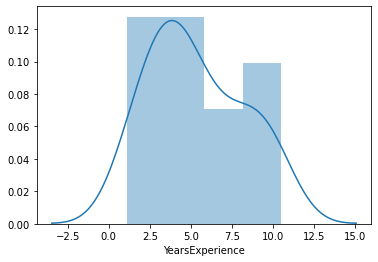

In [7]:
sns.distplot(salary['YearsExperience'])

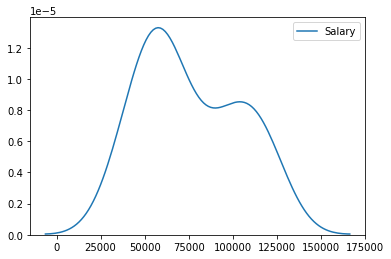

In [11]:
sns.kdeplot(salary['Salary'])

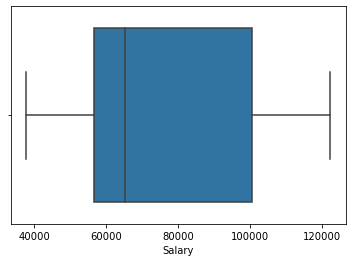

In [13]:
sns.boxplot(salary['Salary'])

In [282]:
X=salary['YearsExperience'].to_frame()

In [283]:
y=salary['Salary'].to_frame()

In [18]:
from sklearn.model_selection import train_test_split

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

In [287]:
sc=StandardScaler()

In [288]:
X_train=sc.fit_transform(X_train)

In [289]:
X_test=sc.transform(X_test)
X_test

array([[ 1.5315002 ],
       [-0.09978613],
       [ 1.04558513],
       [ 0.03904675],
       [-0.68982587],
       [-0.51628477]])

In [7]:
from sklearn.linear_model import LinearRegression

In [291]:
lc=LinearRegression()

In [292]:
lc.fit(X_train,y_train)

LinearRegression()

In [293]:
X_train_preds=lc.predict(X_train)

In [8]:
from sklearn.metrics import r2_score,mean_squared_error

In [295]:
r2_score(y_train,X_train_preds)

0.9645401573418148

In [296]:
y_preds=lc.predict(X_test)

In [297]:
r2_score(y_test,y_preds)

0.9024461774180498

In [72]:
y_preds

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])

In [304]:
lc.predict([[10.5]])

array([[359298.76797125]])

# multiple linear regression

In [74]:
prof=pd.read_csv('50_Startups.csv')

In [259]:
prof.head(20)

,R&D Spend,Administration,Marketing Spend,Profit,State_New York,State_California
0,165349.20,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,1
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,0
5,131876.90,99814.71,362861.36,156991.12,1,0
6,134615.46,147198.87,127716.82,156122.51,0,1
7,130298.13,145530.06,323876.68,155752.60,0,0
8,120542.52,148718.95,311613.29,152211.77,1,0
9,123334.88,108679.17,304981.62,149759.96,0,1


In [76]:
prof.isnull().mean()

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

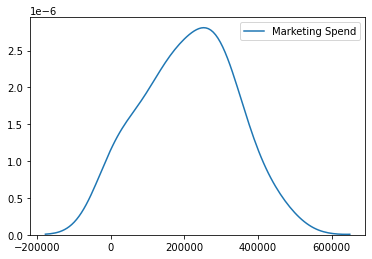

In [80]:
sns.kdeplot(prof['Marketing Spend'])

In [9]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [84]:
prof['State'].nunique()

3

In [85]:
onc=OneHotCategoricalEncoder(variables='State',drop_last=True)

In [86]:
prof=onc.fit_transform(prof)

In [87]:
prof.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_New York,State_California
0,165349.20,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,1
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,0


In [88]:
P_x=prof[['R&D Spend','Administration','Marketing Spend','State_New York','State_California']]

In [89]:
P_y=prof['Profit']

In [91]:
P_x_train, P_x_test, P_y_train, P_y_test = train_test_split(P_x, P_y, test_size=0.20, random_state=42)

In [93]:
P_x_train[['R&D Spend','Administration','Marketing Spend']]=sc.fit_transform(P_x_train[['R&D Spend','Administration','Marketing Spend']])

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [95]:
P_x_test[['R&D Spend','Administration','Marketing Spend']]=sc.transform(P_x_test[['R&D Spend','Administration','Marketing Spend']])

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [97]:
P_x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 13 to 19
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         10 non-null     float64
 1   Administration    10 non-null     float64
 2   Marketing Spend   10 non-null     float64
 3   State_New York    10 non-null     int32  
 4   State_California  10 non-null     int32  
dtypes: float64(3), int32(2)
memory usage: 400.0 bytes


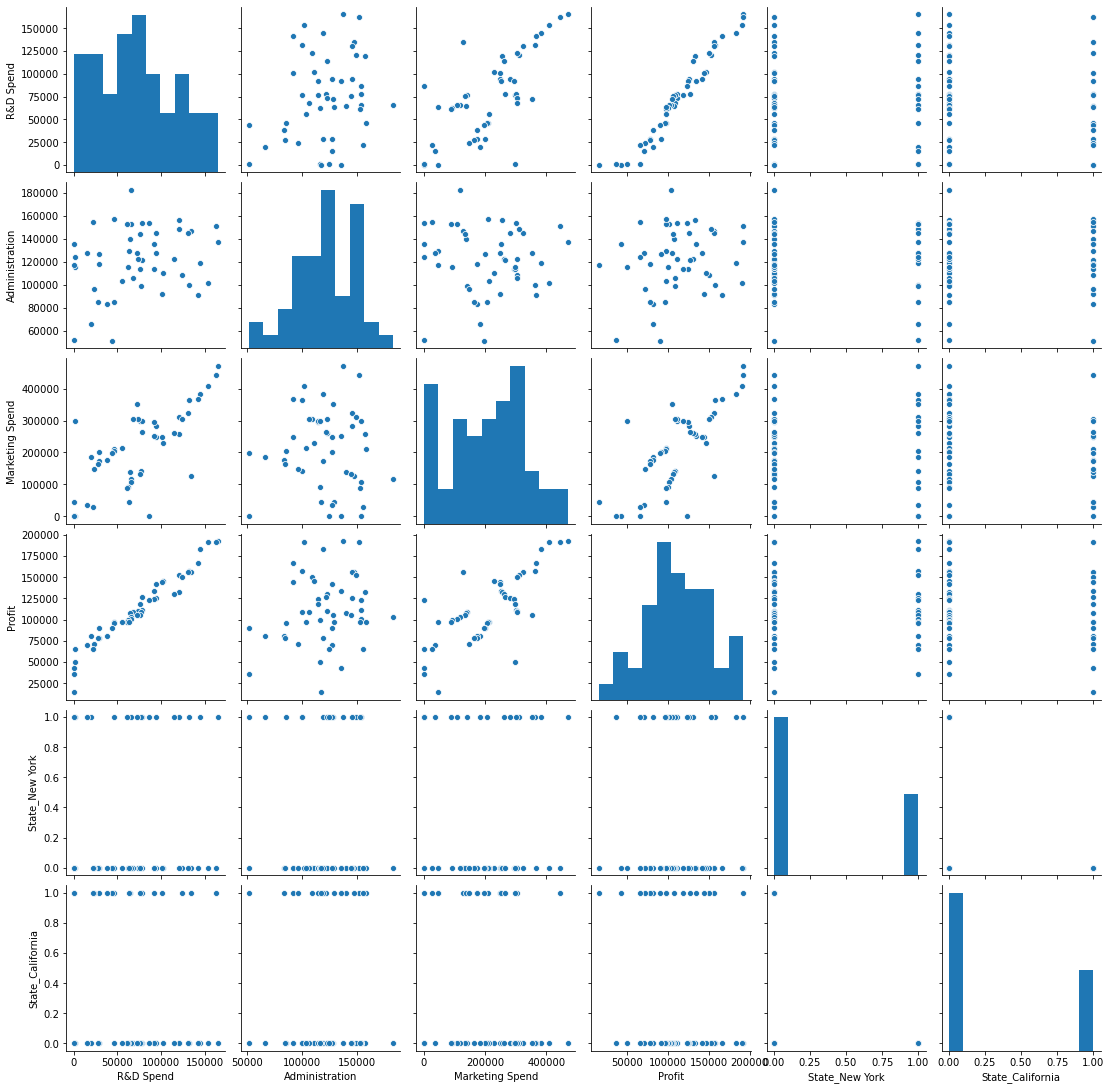

In [98]:
sns.pairplot(prof)

In [272]:
lc.fit(P_x_train,P_y_train)

LinearRegression()

In [273]:
lc.intercept_

116259.66493200722

In [274]:
lc.coef_

array([38102.26926978, -1864.75430033,  3386.17580673,  -931.80524618,
        -938.79300615])

In [275]:
P_x_train_preds=lc.predict(P_x_train)

In [276]:
P_x_train_preds

array([129287.25932268, 174098.25202606,  91886.85822604, 150220.99659011,
       173623.19035616, 156165.84489947,  76521.47893717,  56930.33870602,
        44712.3085635 , 145679.58311302, 155019.87822287, 116405.47712513,
       113471.56812701,  86876.30432577,  95418.08570235, 191913.7274038 ,
        62092.25276442, 113876.00520371,  98993.33790342, 164246.36680458,
        99560.68684705, 136274.54962586,  75324.0220735 , 187861.47839007,
       115558.98201737, 183805.40426665,  58825.43932911,  91390.89209802,
       111197.68506734,  74197.75183475, 136305.2407773 , 115188.84018874,
       129833.75780392,  47329.63344539, 116544.51129346, 159597.70047229,
        70875.84128325, 148486.45402739,  99143.48842753,  71327.34640771])

In [10]:
from sklearn.metrics import mean_absolute_error,r2_score

In [278]:
mean_absolute_error(P_x_train_preds,P_y_train)

6662.65624090711

In [279]:
P_y_preds=lc.predict(P_x_test)

In [280]:
mean_absolute_error(P_y_test,P_y_preds)

6961.477813275558

In [281]:
lc.predict([[50000,12400,30049,1,0]]).round(10)

array([1.98385703e+09])

# Polynomial regression

In [129]:
post=pd.read_csv('Position_Salaries.csv')

In [130]:
post.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [131]:
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [249]:
X=post['Level'].to_frame()

In [250]:
y=post['Salary'].to_frame()

In [251]:
X_poly=poly_reg.fit_transform(X)

In [248]:
poly_reg=PolynomialFeatures(degree=2)

In [252]:
lc2=LinearRegression()

In [253]:
lc2.fit(X_poly,y)

LinearRegression()

In [254]:
lc2.coef_

array([[      0.        , -132871.21212121,   19431.81818182]])

In [255]:
y_pred=lc2.predict(X_poly)

In [256]:
mean_absolute_error(y_pred,y)

70218.18181818188

In [257]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

Text(0, 0.5, 'Salary')

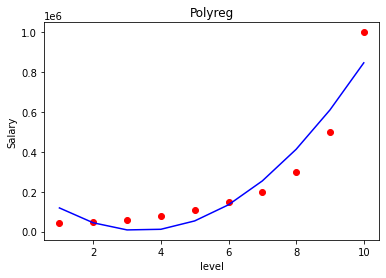

In [258]:
plt.scatter(X,y, color='red')
plt.plot(X,y_pred,color='blue')
plt.title('Polyreg')
plt.xlabel('level')
plt.ylabel('Salary')

# Decision tree regression

In [305]:
dest=pd.read_csv('50_Startups.csv')

In [306]:
dest.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [461]:
D_x=dest.iloc[:,:-1]

In [462]:
D_y=dest.iloc[:,-1]

In [463]:
D_x.tail()

,R&D Spend,Administration,Marketing Spend,State
45,1000.23,124153.04,1903.93,New York
46,1315.46,115816.21,297114.46,Florida
47,0.00,135426.92,0.00,California
48,542.05,51743.15,0.00,New York
49,0.00,116983.80,45173.06,California


In [464]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [465]:
one=OneHotCategoricalEncoder(variables='State', drop_last=True)

In [466]:
D_x=one.fit_transform(D_x)

In [467]:
D_x=np.array(D_x)

In [468]:
D_x

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 0.0000000e+00,
        0.00

In [469]:
from sklearn.tree import DecisionTreeRegressor

In [472]:
D_y=np.array(D_y)

In [473]:
D_y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [474]:
dr=DecisionTreeRegressor(max_depth=4)

In [475]:
D_x_train, D_x_test, D_y_train, D_y_test=train_test_split(D_x, D_y,test_size=0.20, random_state=1)

In [476]:
dr.fit(D_x_train,D_y_train)

DecisionTreeRegressor(max_depth=4)

In [479]:
D_x_train_preds=dr.predict(D_x_train)

In [480]:
mean_absolute_error(D_x_train_preds,D_y_train)

2016.0245750000008

In [481]:
D_y_preds=dr.predict(D_x_test)

In [482]:
mean_absolute_error(D_y_test,D_y_preds)

10503.319999999996

In [484]:
dr.predict([[200,3467,70,1,1]])

array([42559.73])

# compare

In [16]:
data=pd.read_csv('Data1.csv')

In [78]:
data.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


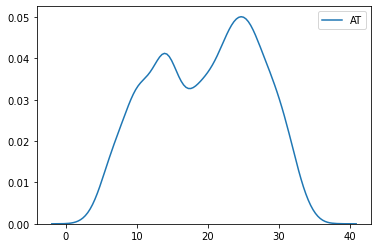

In [45]:
sns.kdeplot(data['AT'])

In [19]:
data.isnull().mean()

AT    0.0
V     0.0
AP    0.0
RH    0.0
PE    0.0
dtype: float64

In [23]:
X=data.drop('PE',axis=1)

In [24]:
X.head(3)

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14


In [106]:
y=data['PE'].to_frame()
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [53]:
from sklearn.linear_model import LinearRegression

In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [55]:
lr=LinearRegression()

In [56]:
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
X_train_preds=lr.predict(X_train)

In [59]:
r2_score(X_train_preds,y_train)

0.9223256410531531

In [60]:
y_preds=lr.predict(X_test)

In [61]:
r2_score(y_preds,y_test)

0.9252473548001369

In [64]:
lr.predict([[5.11,39.40,1012.16,92.14]])

array([[456.02294959]])

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
dt=DecisionTreeRegressor(random_state=1)

In [120]:
X_train1=sc.inverse_transform(X_train)
X_test1=sc.inverse_transform(X_test)

In [81]:
dt.fit(X_train1,y_train)

DecisionTreeRegressor(random_state=1)

In [82]:
X_train_preds=dt.predict(X_train1)

In [84]:
r2_score(X_train_preds,y_train)

1.0

In [86]:
y_test_pred=dt.predict(X_test1)

In [87]:
r2_score(y_test_pred,y_test)

0.9998703015386368

In [91]:
dt.predict([[19,56.32,1000.24,36.64]])

array([450.88])

In [121]:
from sklearn.svm import SVR

In [122]:
sv=SVR(kernel='rbf')

In [123]:
sv.fit(X_train,y_train1)

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [137]:
y_train1=sc.fit_transform(y_train)
y_test1=sc.transform(y_test)

In [125]:
X_train

array([[-1.84397459, -1.47215689,  2.10665289,  0.30082201],
       [ 0.03144247, -0.27792217, -0.7541597 ,  1.28768284],
       [-0.05301162, -0.12560032,  1.95405386, -1.31528203],
       ...,
       [ 0.5341454 ,  0.7420061 ,  0.01889692,  0.42981005],
       [ 1.79291353,  1.21153429, -0.71223689, -2.01413783],
       [-0.01413593, -0.48520551, -0.01631824, -0.30658196]])

In [138]:
preds=sv.predict(X_train)

In [139]:
r2_score(preds,y_train1)

0.9440949828720568

In [140]:
y_preds=sv.predict(X_test)

In [141]:
r2_score(y_test1,y_preds)

0.9461671034677788

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
rf=RandomForestRegressor()

In [132]:
rf.fit(X_train,y_train)

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [133]:
pr=rf.predict(X_train)

In [134]:
r2_score(pr,y_train)

0.9945680496697089

In [135]:
y_pred=rf.predict(X_test)

In [136]:
r2_score(y_pred,y_test)

0.9591774935049597

# Classification

In [142]:
sd=pd.read_csv('Social_Network_Ads.csv')

In [143]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [145]:
sd.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [146]:
sd_x=sd.drop('Purchased',axis=1)

In [147]:
sd_y=sd['Purchased']

In [148]:
sd_x_train, sd_x_test, sd_y_train, sd_y_test = train_test_split(sd_x, sd_y, test_size=0.25, random_state=42)

In [149]:
sd_x_train=sc.fit_transform(sd_x_train)
sd_x_test=sc.transform(sd_x_test)

In [151]:
sd_x_train

array([[ 1.8925893 ,  1.52189404],
       [ 0.1250379 ,  0.03213212],
       [ 0.9106163 , -1.31157471],
       [-1.34792161, -1.48684082],
       [-0.169554  , -0.58129926],
       [-0.56234321,  2.33980255],
       [ 1.0088136 , -1.19473064],
       [-0.75873781,  1.08372877],
       [ 2.1871812 , -1.04867555],
       [ 0.0268406 , -0.25997806],
       [-0.46414591, -1.1363086 ],
       [ 0.1250379 ,  0.03213212],
       [ 1.6961947 , -0.90262046],
       [ 1.1070109 , -0.90262046],
       [ 0.5178271 ,  1.22978386],
       [-1.05332971, -1.4576298 ],
       [-1.15152701, -1.54526286],
       [-0.0713567 ,  0.67477452],
       [ 0.4196298 , -0.46445519],
       [-0.2677513 , -0.25997806],
       [-0.85693511,  0.14897619],
       [ 0.0268406 ,  0.29503128],
       [ 0.7142217 , -1.28236369],
       [ 1.5979974 ,  1.11293979],
       [ 0.812419  , -1.36999675],
       [-1.44611891, -1.22394166],
       [-0.0713567 ,  0.14897619],
       [ 0.4196298 , -0.14313399],
       [-0.2677513 ,

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lm=LogisticRegression()

In [154]:
lm.fit(sd_x_train,sd_y_train)

LogisticRegression()

In [155]:
sd_x_train_pred=lm.predict(sd_x_train)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [157]:
accuracy_score(sd_x_train_pred,sd_y_train)

0.8366666666666667

In [158]:
confusion_matrix(sd_x_train_pred,sd_y_train)

array([[179,  34],
       [ 15,  72]], dtype=int64)

In [159]:
sd_y_pred=lm.predict(sd_x_test)

In [160]:
accuracy_score(sd_y_pred,sd_y_test)

0.86

In [161]:
confusion_matrix(sd_y_pred,sd_y_test)

array([[61, 12],
       [ 2, 25]], dtype=int64)

In [168]:
print(classification_report (sd_y_pred,sd_y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        73
           1       0.68      0.93      0.78        27

    accuracy                           0.86       100
   macro avg       0.82      0.88      0.84       100
weighted avg       0.89      0.86      0.87       100



# knn model

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
kn=KNeighborsClassifier(n_neighbors=5)

In [185]:
kn.fit(sd_x_train,sd_y_train)

KNeighborsClassifier(n_neighbors=10)

In [186]:
che=kn.predict(sd_x_train)

In [187]:
accuracy_score(che,sd_y_train)

0.9033333333333333

In [188]:
sd_y_pred=kn.predict(sd_x_test)

In [189]:
accuracy_score(sd_y_pred,sd_y_test)

0.93

In [190]:
confusion_matrix(sd_y_pred,sd_y_test)

array([[58,  2],
       [ 5, 35]], dtype=int64)

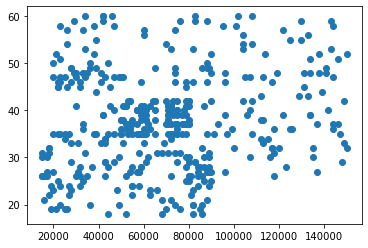

In [194]:
plt.scatter(sd['EstimatedSalary'],sd['Age'])

# naive base classifier

In [6]:
sda=pd.read_csv('Social_Network_Ads.csv')

In [69]:
sda.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
gb=GaussianNB()

In [11]:
X=sda.drop('Purchased',axis=1)

In [12]:
y=sda['Purchased']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 3 to 102
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              320 non-null    int64
 1   EstimatedSalary  320 non-null    int64
dtypes: int64(2)
memory usage: 7.5 KB


In [17]:
y_test.to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 209 to 289
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Purchased  80 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [18]:
ft=StandardScaler()

In [19]:
X_train=ft.fit_transform(X_train)
X_test=ft.transform(X_test)

In [20]:
X_train

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

In [21]:
gb.fit(X_train,y_train)

GaussianNB()

In [61]:
X_train_pred=gb.predict(X_train)

In [62]:
accuracy_score(X_train_pred,y_train)

0.865625

In [63]:
y_test_pred=gb.predict(X_test)

In [64]:
accuracy_score(y_test_pred,y_test)

0.9375

In [86]:
gb.predict(ft.transform([[46,20000]]))

array([1], dtype=int64)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dc=DecisionTreeClassifier(criterion='entropy',splitter='random')

In [72]:
dc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [73]:
X_train_p=dc.predict(X_train)

In [74]:
accuracy_score(X_train_p,y_train)

0.996875

In [76]:
y_test_o=dc.predict(X_test)

In [77]:
accuracy_score(y_test_o,y_test)

1.0

In [87]:
dc.predict(ft.transform([[46,20000]]))

array([1], dtype=int64)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rc=RandomForestClassifier(criterion='entropy',random_state=42)

In [151]:
rc.fit(X_train,y_train)

RandomForestClassifier(random_state=45)

In [152]:
xp=rc.predict(X_train)

In [153]:
accuracy_score(xp,y_train)

0.996875

In [154]:
y_preds=rc.predict(X_test)

In [155]:
accuracy_score(y_preds,y_test)

0.9125

# Compare

In [30]:
com=pd.read_csv('Data.csv')

In [31]:
com.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
com['Class'].nunique()

2

In [7]:
com.isnull().mean()

Sample code number             0.0
Clump Thickness                0.0
Uniformity of Cell Size        0.0
Uniformity of Cell Shape       0.0
Marginal Adhesion              0.0
Single Epithelial Cell Size    0.0
Bare Nuclei                    0.0
Bland Chromatin                0.0
Normal Nucleoli                0.0
Mitoses                        0.0
Class                          0.0
dtype: float64

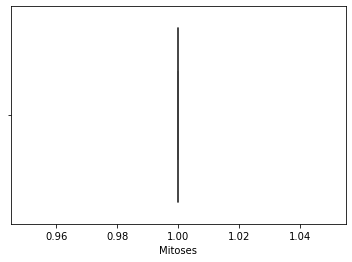

In [14]:
sns.boxplot(com['Mitoses'])

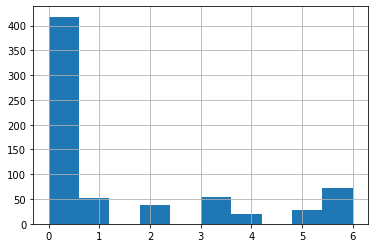

In [203]:
com['Uniformity of Cell Size'].hist()

In [32]:
from feature_engine.discretisers import EqualWidthDiscretiser

In [33]:
ed=EqualWidthDiscretiser(bins=7,
                         variables=
                         ['Normal Nucleoli',
                          'Bland Chromatin','Uniformity of Cell Size','Uniformity of Cell Shape'])

In [34]:
com=ed.fit_transform(com)

In [35]:
from feature_engine.outlier_removers import Winsorizer

In [36]:
wi=Winsorizer(distribution='skewed',tail='both',fold=1.5,variables=['Marginal Adhesion','Single Epithelial Cell Size',
                                                                    'Bland Chromatin',
                                                                 'Normal Nucleoli','Mitoses'])

In [37]:
com=wi.fit_transform(com)

In [38]:
X=com.drop(['Sample code number','Class'],axis=1)

In [39]:
y=com['Class'].to_frame()

In [55]:
com['Class'].dtype

dtype('int64')

In [40]:
sd=StandardScaler()

In [42]:
X_train=sd.fit_transform(X_train)
X_test=sd.transform(X_test)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
rc.fit(X_train,y_train)

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', random_state=42)

In [44]:
xp=rc.predict(X_train)

In [45]:
accuracy_score(xp,y_train)

1.0

In [46]:
yp=rc.predict(X_test)

In [47]:
accuracy_score(yp,y_test)

0.9590643274853801

In [48]:
dc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [49]:
xp=dc.predict(X_train)

In [50]:
accuracy_score(xp,y_train)

1.0

In [51]:
yp=dc.predict(X_test)

In [52]:
accuracy_score(yp,y_test)

0.935672514619883

In [53]:
gb.fit(X_train,y_train)

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [54]:
xp=gb.predict(X_train)

In [55]:
accuracy_score(xp,y_train)

0.96484375

In [56]:
yp=gb.predict(X_test)

In [57]:
accuracy_score(yp,y_test)

0.9707602339181286

In [58]:
kn.fit(X_train,y_train)

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier()

In [59]:
xp=kn.predict(X_train)

In [60]:
accuracy_score(xp,y_train)

0.96484375

In [61]:
yp=kn.predict(X_test)

In [62]:
accuracy_score(yp,y_test)

0.9473684210526315

In [63]:
from sklearn.svm import SVC

In [64]:
sv=SVC(kernel='rbf',random_state=35)

In [65]:
sv.fit(X_train,y_train)

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(random_state=35)

In [66]:
xp=sv.predict(X_train)

In [67]:
accuracy_score(xp,y_train)

0.97265625

In [68]:
yp=sv.predict(X_test)

In [69]:
accuracy_score(yp,y_test)

0.9649122807017544

In [70]:
X_test

array([[ 1.29123934, -0.17993131,  0.26737274, ..., -0.20110339,
        -0.02904672,  0.        ],
       [ 1.29123934,  1.71954974,  1.21474188, ...,  1.51497884,
         2.17420075,  0.        ],
       [-1.22523798, -0.65480157, -0.67999641, ..., -0.20110339,
        -0.57985859,  0.        ],
       ...,
       [ 1.29123934,  2.19442001,  2.16211103, ...,  2.65903365,
         2.17420075,  0.        ],
       [-0.1467477 ,  1.71954974,  1.21474188, ...,  1.51497884,
         1.07257701,  0.        ],
       [-0.50624446,  0.29493895,  0.26737274, ..., -0.20110339,
        -0.02904672,  0.        ]])

# Unsupervised learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
mal=pd.read_csv('Mall_Customers.csv')

In [5]:
mal.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
mal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
X=mal.iloc[:,3:5]

In [11]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [12]:
from sklearn.cluster import KMeans

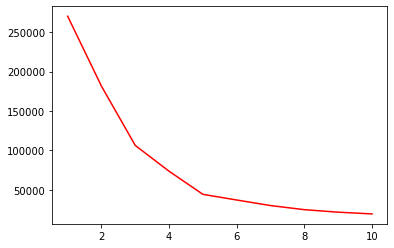

In [25]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=35)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color='red')    
    

In [43]:
ki=KMeans(n_clusters=5,init='k-means++',random_state=30)

In [44]:
ki.fit(X)

KMeans(n_clusters=5, random_state=30)

In [45]:
y_clus=ki.fit_predict(X)

In [48]:
ki.cluster_centers_

array([[86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [46]:
y_clus

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

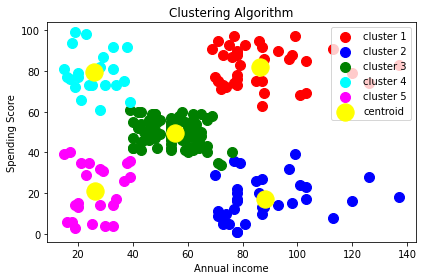

In [47]:
plt.scatter(X.iloc[y_clus==0,0],X.iloc[y_clus==0,1],color='red',s=100,label='cluster 1')
plt.scatter(X.iloc[y_clus==1,0],X.iloc[y_clus==1,1],color='blue',s=100,label='cluster 2')
plt.scatter(X.iloc[y_clus==2,0],X.iloc[y_clus==2,1],color='green',s=100,label='cluster 3')
plt.scatter(X.iloc[y_clus==3,0],X.iloc[y_clus==3,1],color='cyan',s=100,label='cluster 4')
plt.scatter(X.iloc[y_clus==4,0],X.iloc[y_clus==4,1],color='magenta',s=100,label='cluster 5')
plt.scatter(ki.cluster_centers_[:,0],ki.cluster_centers_[:,1],s=300,label='centroid',color='yellow')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.title('Clustering Algorithm')
plt.legend(loc=1)
plt.tight_layout()



# hierarchical clustering

In [51]:
from scipy.cluster import hierarchy as sh

Text(0, 0.5, 'Ecludean distance')

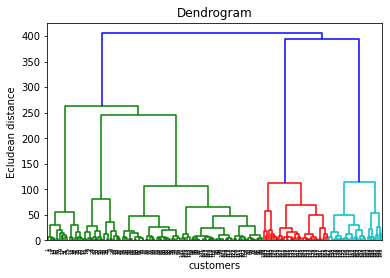

In [70]:
sh.dendrogram(sh.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('customers')
plt.ylabel('Ecludean distance')

In [54]:
from sklearn.cluster import AgglomerativeClustering 

In [67]:
agg=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [68]:
yh=agg.fit_predict(X)

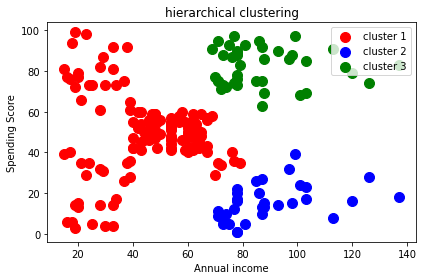

In [69]:
plt.scatter(X.iloc[yh==0,0],X.iloc[yh==0,1],color='red',s=100,label='cluster 1')
plt.scatter(X.iloc[yh==1,0],X.iloc[yh==1,1],color='blue',s=100,label='cluster 2')
plt.scatter(X.iloc[yh==2,0],X.iloc[yh==2,1],color='green',s=100,label='cluster 3')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.title('hierarchical clustering')
plt.legend(loc=1)
plt.tight_layout()


# association rule(Apriori and eclat)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bas=pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [15]:
bas.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
bask=[]
for i in range(0,7501):
    bask.append([str(bas.iloc[i,j]) for j in range(0,20)])

In [17]:
from apyori import apriori

In [18]:
ap=apriori(transactions=bask,min_support=0.005,min_confidence=0.2,min_lift=3,min_length=2,max_length=6)

In [19]:
result=list(ap)

In [20]:
result

[RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]),
 RelationRecord(items=frozenset({'tomato sauce', 'ground beef'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomato sauce'}), items_add=frozenset({'groun

In [21]:
def inspect(result):
    lhs= [tuple(result[2][0][0])[0] for result in result]
    rhs=[tuple(result[2][0][1])[0] for result in result]
    support=[result[1] for result in result]
    confidences=[result[2][0][2] for result in result]
    lifts =[result[2][0][3] for result in result]
    return list(zip(lhs,rhs,support,confidences,lifts))

In [22]:
result_frame=pd.DataFrame(inspect(result),columns=['Left hand side','right_hand_side','support','confidence','lift'])

In [31]:
tuple(result[1])

(frozenset({'escalope', 'mushroom cream sauce'}),
 0.005732568990801226,
 [OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])

In [32]:
result[1]

RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])

In [23]:
result_frame

,Left hand side,right_hand_side,support,confidence,lift
0,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
1,pasta,escalope,0.005866,0.372881,4.700812
2,herb & pepper,ground beef,0.015998,0.323450,3.291994
3,tomato sauce,ground beef,0.005333,0.377358,3.840659
4,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,pasta,shrimp,0.005066,0.322034,4.506672
6,frozen vegetables,shrimp,0.005333,0.232558,3.254512
7,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
8,pasta,escalope,0.005866,0.372881,4.700812
9,frozen vegetables,ground beef,0.008666,0.311005,3.165328


In [25]:
result_frame.nlargest(n=37,columns='support')

,Left hand side,right_hand_side,support,confidence,lift
2,herb & pepper,ground beef,0.015998,0.323450,3.291994
16,herb & pepper,nan,0.015998,0.323450,3.291994
9,frozen vegetables,ground beef,0.008666,0.311005,3.165328
26,frozen vegetables,nan,0.008666,0.311005,3.165328
4,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
22,whole wheat pasta,nan,0.007999,0.271493,4.130772
10,mineral water,frozen vegetables,0.007199,0.305085,3.200616
20,milk,olive oil,0.007199,0.203008,3.082509
27,mineral water,nan,0.007199,0.305085,3.200616
35,milk,nan,0.007199,0.203008,3.088761


# NLP

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
nlp=pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [71]:
nlp.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [103]:
nlp['Review'][0]

'Wow... Loved this place.'

In [101]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ',nlp['Review'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in  set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GTDNL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [167]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1530)
X=cv.fit_transform(corpus).toarray()
y=nlp['Liked'].to_frame()

In [168]:
len(X[0])

1530

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [171]:
from sklearn.naive_bayes import GaussianNB

In [172]:
gb=GaussianNB()

In [173]:
gb.fit(X_train,y_train)

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [174]:
xpred=gb.predict(X_train)

In [175]:
accuracy_score(xpred,y_train)

0.9125

In [176]:
y_pred=gb.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score,classification_report

In [177]:
accuracy_score(y_pred,y_test)

0.72

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
rc=RandomForestClassifier()

In [180]:
rc.fit(X_train,y_train)

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [181]:
ypred=rc.predict(X_test)

In [182]:
accuracy_score(ypred,y_test)

0.72

In [183]:
from sklearn.svm import SVC

In [284]:
svc=SVC(kernel='rbf')

In [185]:
svc.fit(X_train,y_train)

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [186]:
yp=svc.predict(X_test)

In [187]:
accuracy_score(yp,y_test)

0.74

# dimensional reduction

In [188]:
wines=pd.read_csv('Wine.csv')

In [189]:
wines.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [190]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [231]:
from sklearn.preprocessing import StandardScaler

In [241]:
X=wines.drop('Customer_Segment',axis=1)
y=wines['Customer_Segment']

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [274]:
st=StandardScaler()

In [275]:
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

In [266]:
from sklearn.decomposition import PCA

In [267]:
pca=PCA(n_components=2)

In [268]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [270]:
svc.fit(X_train,y_train)
pre=svc.predict(X_test)
accuracy_score(pre,y_test)

1.0

In [201]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
fc=RandomForestClassifier()

In [203]:
fc.fit(X_train,y_train)

RandomForestClassifier()

In [205]:
xpr=fc.predict(X_train)

In [206]:
accuracy_score(xpr,y_train)

1.0

In [207]:
ypr=fc.predict(X_test)

In [208]:
accuracy_score(ypr,y_test)

0.9555555555555556

In [211]:
X_train

array([[-2.50373583e+00, -1.01795324e+00,  9.90551593e-01],
       [-7.87271688e-01,  2.21838131e+00, -1.74715012e+00],
       [ 1.09929100e+00,  9.94751349e-01,  2.98166426e+00],
       [ 2.67964866e+00, -5.21565856e-01, -1.25503177e+00],
       [-2.82377961e+00, -8.09420125e-01,  3.40592663e-02],
       [-3.49450370e-01,  1.93697164e+00, -2.61307269e+00],
       [-2.68486276e+00, -1.50339080e+00, -5.19783441e-01],
       [-1.75125944e+00, -7.98147407e-01,  6.97044801e-02],
       [ 2.75083588e+00, -2.31586200e+00, -7.44974950e-01],
       [ 3.05068245e+00, -4.63464043e-01, -8.01470475e-01],
       [-4.16080217e-01,  2.01943539e+00, -5.90699428e-01],
       [-1.31604015e+00,  7.48442275e-01, -1.51913938e+00],
       [-1.37117424e+00, -6.38319842e-01,  5.06730723e-01],
       [-7.52387039e-01,  2.32685999e+00, -2.53944054e-02],
       [-2.51017798e+00,  1.23091656e-02, -2.36830562e-01],
       [ 4.23968635e+00, -6.98622167e-01, -1.14566140e+00],
       [-1.02500986e+00,  2.42880075e+00

In [213]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [221]:
lda=LDA(n_components=2)

In [222]:
X_train=lda.fit_transform(X_train,y_train)
X_test=lda.transform(X_test)

In [223]:
fc.fit(X_train,y_train)

RandomForestClassifier()

In [224]:
pre=fc.predict(X_test)

In [225]:
accuracy_score(pre,y_test)

1.0

In [ ]:
plt.scatter()

In [249]:
X_train.shape

(133, 2)

Text(0, 0.5, 'Second component')

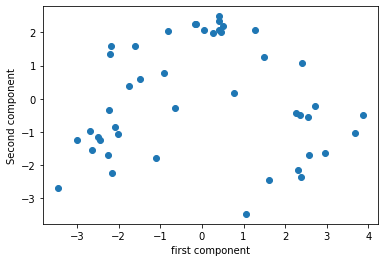

In [271]:
plt.scatter(X_test[:,0],X_test[:,1])
plt.xlabel('first component')
plt.ylabel('Second component')

In [255]:
pca.components_

array([[-0.14452285,  0.24863496, -0.00132829,  0.23338554, -0.1524952 ,
        -0.39159214, -0.41707877,  0.2864982 , -0.32510915,  0.11180333,
        -0.29652639, -0.3808983 , -0.28103517],
       [-0.49081908, -0.21437162, -0.26376212,  0.09198702, -0.26348957,
        -0.06398891, -0.00411574, -0.05290197, -0.0246094 , -0.54788657,
         0.29020834,  0.15834196, -0.38560874]])

In [258]:
corr=pd.DataFrame(pca.components_,columns=column_names)

In [256]:
wines.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [257]:
column_names=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

In [259]:
import seaborn as sns

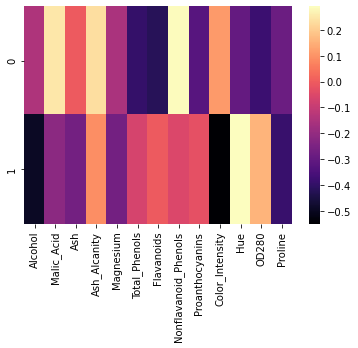

In [260]:
sns.heatmap(corr,cmap='magma')

In [272]:
from sklearn.decomposition import KernelPCA

In [278]:
kpca=KernelPCA(n_components=2,kernel='rbf')
X_train=kpca.fit_transform(X_train)
X_test=kpca.transform(X_test)

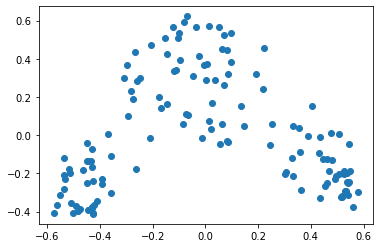

In [279]:
plt.scatter(X_train[:,0],X_train[:,1])

In [285]:
svc.fit(X_train,y_train)

SVC()

In [287]:
pre=svc.predict(X_test)
accuracy_score(pre,y_test)

0.9777777777777777

In [282]:
from sklearn.metrics import confusion_matrix

In [283]:
confusion_matrix(pre,y_test)

array([[14,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 12]], dtype=int64)

In [1]:
from sklearn.cluster import Gau

In [ ]:
db=DBSCAN()